# Incident of Caza Cafe 

28 of December 2019, a group of young Libyan girls had gathered in a meet and greet sort of an event that brings together women from Twitter for a coffee and a chat. The event was orginized by libyan twitter useres. That same event was raided by the "Moral Police". Moral Police is group that 'act' to enforce a code of morality, which is any activity that these groups, the government or police deem to find "immoral" and/or "against Libyan culture". 

In a response to that incident, a disbute took over Libyan social media platfroms over the indecient, that was described to be a gender based violance generated and applied by the certain "powers" in the govermen, even though legal legislations strongly prevent such actions.

In a result to the outragous raid, the event was shut down, the women who participated were dragged by different names to silence them, some even went further to obtain a video that was shot in private and shared over socail media without consent. The vidoe contained, to their horrors, women chatting, singing and drinking coffee. 

The moral police actions were justified by claiming that the event hosted different immoral activities, gambeling, drinking and adultry, the workers at the cafe were detained for two days for investigation. All of these claims were weavered Sunday at Benghazi courthouse. The reactions however, to everyone's surpirse were diverse, some had condemend the actions of the morals police while others thought 'it was the right thing to do.' 

This sort of shutdown isn't new, it had happened before to few events over the years that proceeded the Libyan revolution, but after what went on in Benghazi post 2014 and the war against ISIS, we had  all hoped that the country is taking more of a progressive, libral turn. 

This resulted in different hashtags on twitter and facebook, as a Data Scientist, I did what anyone in my place would do, I wanted to figure out who were the majorty in this? Are our hopes of country where indiviual freedoms and human rights are respected and honored is a stroke of madness ?

I decided to take one of the most used hashtags to discuss the event, collect the tweets and see what the majorty had to say about it.  








## Data Collecting and Cleaning : 

First of all, I applied Twitter API to download tweets that were used under the hashtag '#كلنا_كازا'. 


In [2]:
#import libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#twitter api 
import tweepy

consumer_key="*********"
consumer_secret="*********"
access_token="*********"
access_token_secret="*********"

# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)



In [38]:
# Continue with rest of code
import sys
import jsonpickle
import os

searchQuery = '#كلنا_كازا'  # this is what we're searching for
maxTweets = 10000 
tweetsPerQry = 100 
fName = 'tweets.txt' # We'll store the tweets in a text file.

# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -1

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1))
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))


Downloaded 70 tweets
Downloaded 131 tweets
Downloaded 177 tweets
Downloaded 230 tweets
Downloaded 307 tweets
Downloaded 376 tweets
Downloaded 454 tweets
Downloaded 518 tweets
Downloaded 591 tweets
Downloaded 668 tweets
Downloaded 741 tweets
Downloaded 832 tweets
Downloaded 918 tweets
Downloaded 1009 tweets
Downloaded 1107 tweets
Downloaded 1194 tweets
Downloaded 1275 tweets
Downloaded 1365 tweets
Downloaded 1447 tweets
Downloaded 1508 tweets
Downloaded 1593 tweets
Downloaded 1671 tweets
Downloaded 1740 tweets
Downloaded 1814 tweets
Downloaded 1876 tweets
Downloaded 1925 tweets
Downloaded 1990 tweets
Downloaded 2087 tweets
Downloaded 2178 tweets
Downloaded 2276 tweets
Downloaded 2375 tweets
Downloaded 2458 tweets
Downloaded 2558 tweets
Downloaded 2653 tweets
Downloaded 2753 tweets
Downloaded 2853 tweets
Downloaded 2949 tweets
Downloaded 3048 tweets
Downloaded 3147 tweets
Downloaded 3247 tweets
Downloaded 3347 tweets
Downloaded 3447 tweets
Downloaded 3524 tweets
No more tweets found
Down

## Clean and Tokenize the tweets into indiviual words : 

In [5]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 #Example to what the code does 
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(preprocess(tweet))

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [6]:
#read tweets text into a list
tokens_list =[] 
with open('tweets.txt', 'r',encoding = 'utf8') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        tokens_list.append(tokens)

In [7]:
# resulting list at index 0
tokens_list[0]

['RT',
 '@eldelli_',
 ':',
 'ونحن',
 'على',
 'مشارف',
 '٢٠١٩',
 'وتتطور',
 'الشعوب',
 'والعالم',
 'اصادف',
 'هاشتاق',
 '#كلنا_كازا',
 'بنات',
 'تجمعوا',
 'في',
 'كافيه',
 'ليمارسوا',
 'انشطه',
 'ترفيهيه',
 'للبنات',
 'وتأتي',
 'ا',
 '…']

In [94]:
#iterate over lists and remove RT, @,Hashtags, etc for cleaner analysis, this is pretty basic code. 

testList = [[item.replace('RT', '') for item in lst] for lst in tokens_list]
testList = [[item.replace('@', '') for item in lst] for lst in testList]
testList = [[item.replace('.', '') for item in lst] for lst in testList]
testList = [[item.replace(':', '') for item in lst] for lst in testList]
testList = [[item.replace('#كلنا_كازا', '') for item in lst] for lst in testList]
testList = [[item.replace('http', '') for item in lst] for lst in testList]
testList = [[item.replace('اللي', '') for item in lst] for lst in testList]
testList = [[item.replace('الي', '') for item in lst] for lst in testList]
testList = [[item.replace('#تجمع_نبات_التويتر', '') for item in lst] for lst in testList]
testList = [[item.replace('إلى', '') for item in lst] for lst in testList]
testList = [[item.replace('tco', '') for item in lst] for lst in testList]
testList = [[item.replace('في', '') for item in lst] for lst in testList]
testList = [[item.replace('التجمع', '') for item in lst] for lst in testList]
testList = [[item.replace('الى', '') for item in lst] for lst in testList]
testList = [[item.replace('امس', '') for item in lst] for lst in testList]
testList = [[item.replace('مقر', '') for item in lst] for lst in testList]
testList = [[item.replace('المحامي', '') for item in lst] for lst in testList]
testList = [[item.replace('مقر', '') for item in lst] for lst in testList]
testList = [[item.replace('أمس', '') for item in lst] for lst in testList]
testList = [[item.replace('للحضور', '') for item in lst] for lst in testList]
testList = [[item.replace('العامة', '') for item in lst] for lst in testList]
testList = [[item.replace('عصام', '') for item in lst] for lst in testList]
testList = [[item.replace('التاجوري', '') for item in lst] for lst in testList]
testList = [[item.replace('الماجوري', '') for item in lst] for lst in testList]
testList = [[item.replace('اليوم', '') for item in lst] for lst in testList]
testList = [[item.replace('يوم', '') for item in lst] for lst in testList]


In [95]:
#remove all empty chars
testList = [list(filter(None, lst)) for lst in testList] 

In [96]:
#import arabic stopwords from NLTK corpus 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

filtered_words = [word for word in testList if word not in stopwords.words('arabic')]

In [97]:
#write the resultted list of filtered words into text file 
with open('filtered_words.txt', 'w',encoding = 'utf8') as f:
    for item in filtered_words:
        f.write("%s\n" % item)

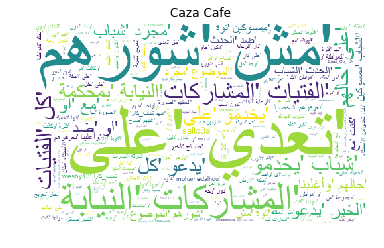

In [108]:
#libraries for arabic wordcloud illistration 
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 


f = open('filtered_words.txt', 'r', encoding='utf-8')
data = arabic_reshaper.reshape(f.read())
data = get_display(data) # add this line
WordCloud = WordCloud(font_path='arial', background_color='white',
                  mode='RGB', width=500, height=300).generate(data)
plt.title("Caza Cafe")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

# Results 

From the obtained wordcloud we can see that most dominated words are : "مش شورهم", "يخدموا","تعدي على",  "مجرد شباب". 
What does that tell us ? the majorty is outraged, what happened was deemed to be unacceptable, a middling of indiviual freedom and it won't be accepted. 

# Conclusion ? 
Probably, there might be a light at the end of the tunnle, we're the majorty. 


### Sources : 

https://labsblog.f-secure.com/2018/01/26/how-to-get-tweets-from-a-twitter-account-using-python-and-tweepy/
https://bhaskarvk.github.io/2015/01/how-to-use-twitters-search-rest-api-most-effectively./
https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/
http://www.spencegreen.com/2008/12/19/python-arabic-unicode/
